In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

Teraz wczytam dane którymi będą dane z kolokwium z fizyki z pliku dane_z_fizyki.csv

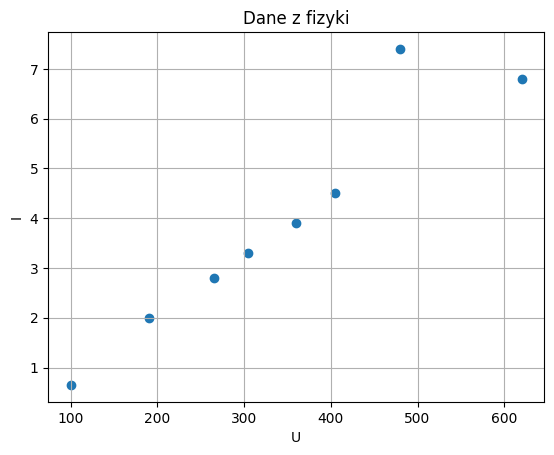

In [41]:
with open('dane_z_fizyki.csv') as f:
    data = pd.read_csv(f, sep=';')

x = data['I']
y = data['U']

wykres = plt.figure()
plt.scatter(x, y)
plt.xlabel('U')
plt.ylabel('I')
plt.title('Dane z fizyki')
plt.grid()
plt.show()

In [42]:
X1 = np.array(x)
Y = np.array(y)
m=len(X1)
print(X1)
print(Y)

[100 190 265 305 360 405 480 620]
[0.65 2.   2.8  3.3  3.9  4.5  7.4  6.8 ]


In [43]:
X1 = X1.reshape(m, 1) # zmiana wymiarów macierzy X1 z (m,) na (m, 1)
bias = np.ones((m, 1)) # bias - to macież jednostkowa o wymiarach m x 1
X1 = np.hstack((bias, X1)) # dodanie biasu do macierzy X1
print(X1)
print(X1.shape)


[[  1. 100.]
 [  1. 190.]
 [  1. 265.]
 [  1. 305.]
 [  1. 360.]
 [  1. 405.]
 [  1. 480.]
 [  1. 620.]]
(8, 2)


"source": [
        "### <a name='2'></a> Równanie normalne\n",
        "\n",
        "Regresja liniowa w $R^2$:\n",
        "$$Y = w_0 + w_1X_1$$\n",
        "$$Y = W^TX$$\n",
        "gdzie: $$W= \\left[\\begin{matrix}w_0\\\\w_1\\end{matrix}\\right]$$ $$ X= \\left[\\begin{matrix}1\\\\X_1\\end{matrix}\\right] $$ stąd $$ W^T= \\left[\\begin{matrix}w_0&w_1\\end{matrix}\\right] $$    \n",
        "$$Y = W^TX = \\left[\\begin{matrix}w_0&w_1\\end{matrix}\\right] \\cdot  \\left[\\begin{matrix}1\\\\X_1\\end{matrix}\\right] = w_0 + w_1X_1$$\n",
        "\n",
        "Równanie normalne - równanie pozwalające obliczyć minimum funkcji straty (o ile istnieje)\n",
        "$$W = (X^TX)^{-1}(X^TY)$$"
      ]

In [44]:
np.dot(X1.T, X1) # iloczyn macierzy X1.T i X1

array([[8.000000e+00, 2.725000e+03],
       [2.725000e+03, 1.117775e+06]])

In [45]:
Lewa = np.linalg.inv(np.dot(X1.T, X1)) # odwrócenie macierzy iloczynu X1.T i X1
Lewa

array([[ 7.37039052e-01, -1.79681190e-03],
       [-1.79681190e-03,  5.27504410e-06]])

In [46]:
Prawa = np.dot(X1.T, Y) # iloczyn macierzy X1.T i Y
Prawa

array([   31.35, 13188.  ])

In [47]:
W = np.dot(Lewa, Prawa) # iloczyn macierzy odwrotnej do X1.T i X1 oraz X1.T i Y
W

array([-0.590181  ,  0.01323723])

### A więc końcową postacią modelu jest:
$$Y = -0.590181 + 0.01323723 X_1$$
*Czyli nasza linia trendu przecina oś OY na poziomie -0,6 i jej nachylenie ma wartości 0,013*


\n
## A teraz tosamo tylko szybiej prościej i ciekawiej bo w SCIKIT-LEARN

In [51]:
regression = LinearRegression()
regression.fit(X1, Y)
print(regression.intercept_)
print(regression.coef_[1])

-0.5901809999505447
0.013237228623708023


## Ta dam! 
#### Jak widać to samo


teraz zróbmy z tego użytek i zobaczmy jak ona wygląda na wykresie:

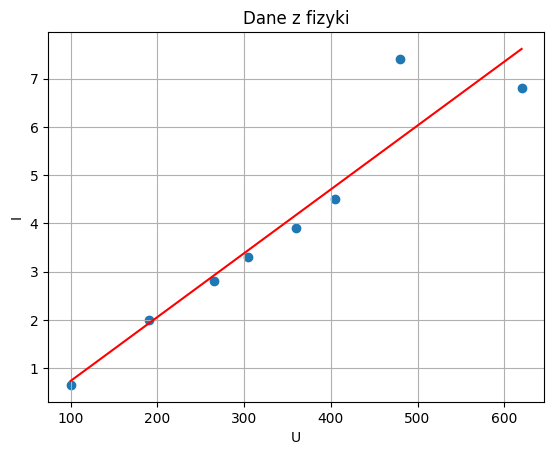

In [54]:
wykres_regresji = plt.figure()
plt.scatter(x, y)
plt.xlabel('U')
plt.ylabel('I')
plt.title('Dane z fizyki')
plt.grid()
trend_line = regression.predict(X1)
plt.plot(x, trend_line, color='red')
plt.show()